#### In this notebook, I'll take a look at data for more than 175,000 songs on Spotify collected using the Spotify Web API and made available on Kaggle (https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv).

#### The dataset contains information related to almost 175000 songs and was obtained from the Spotify Web API.
#### The dataset has 174389 examples and 19 features. The 19 features in the dataset are: acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo, valence and year.

#### Acousticness is a numerical, continuous variable and is of datatype float. Acousticness is a relative measure of how acoustic the song is. The values of this feature range from 0 to 1. 

#### Artists is a categorical variable and is of datatype string. Artists represents the people who produced a particular song.  

#### Danceability is a numerical, continious variable and is of datatype float. Danceability is a relative measure of how danceable the song is. The values of this feature range from 0 to 1.

#### duration_ms is a numerical, discrete variable and is of datatype integer. duration_ms is the length of the song in milliseconds (ms). It ranges from 4937 ms to 5338302 ms.

#### energy is a numerical, continuous variable  and is of datatype float. energy is a relative measure of how energetic the song is. The values of this feature range from 0 to 1.

#### explicit is binary, discrete variable and is of datatype integer. Explicit has a value of 1 if a song contains explicit content and a value of 0 if the song does not contain explicit content.

#### instrumentalness is a numerical, continuous variable and is of datatype float. instrumentalness is a relative measure how instrumental the song is. The values of this feature range from 0 to 1.

#### key is categorical, discrete variable and is of datatype integer. key is the primary key of the song and holds values between 0 and 11. 

#### liveness is a numerical, continious variable and is of datatype float. Liveness represents the probability of the presence of an audience in the song. The values of this feature range from 0 to 1.

#### Loudness is a umerical, continuous variable and is of datatype float. Loudness is a relative measure of how long the song is. It ranged from -60 dB to 0 dB (decibel).

#### mode is a binary, discrete variable and is of datatype integer. Mode has a value of 1 if the song starts with a major chord and value of 0 if the song does not start with a major chord. 

#### popularity is a numerical, discrete variable and is of datatype integer. Popularity is The popularity of the song in the US and ranges from 0 to 100.

#### speechiness is numerical, continious variable and is of datatype float. speechiness is the relative measure of how many spoken words there are in the song. The values of this feature range from 0 to 1.

#### tempo is numerical, continuous variable and is of datatype float. Tempo is the tempo of the song in beats per minute. The values of this feature range from 0 to 243.507

#### valence is numerical, continious and is of datatype float. valence is the relative measure of how positive a song is. The values of this feature range from 0 to 1.

#### Year is numerical, discrete variable and is of datatype integer. Year represents the year the song was released. The values of this feature range from 1921 to 2020.

#### release_date is categorical and is of datatype string. release date is date of release of the song in yyyy-mm-dd, yyyy-mm, or yyyy format. 

#### name is categorical and is of datatype string. Name represents the name of the song.

#### id is categorical and is of datatype string. id is a unique indentifier of each song. 


#### Using EDA, I would like to explore what makes a song popular.

#### We should clean the data by removing columns that we do not need to answer our hypothesis. Because we are trying to see the role our features play in making a song popular, we only need to use numerical columns because the categorical columns in this dataset are not relevant to the question we are trying to answer.  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('./utility/data/data.csv')

In [4]:
data.shape

(174389, 19)

In [228]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


#### We will first split the columns in our data into categorical and numerical columns.

In [229]:
spotify_numeric_data = data.select_dtypes(include=[np.number])
spotify_categorical_data = data.select_dtypes(exclude=[np.number])

print("Numerical Columns: " , spotify_numeric_data.columns.tolist())
print("\n")
print("Categorical Columns: ",spotify_categorical_data.columns.tolist())

Numerical Columns:  ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']


Categorical Columns:  ['artists', 'id', 'name', 'release_date']


In [230]:
data = data.drop(spotify_categorical_data, axis=1)
data.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920


#### Key and Year are features that are not relevant to the popularity of a song so we also drop these two features from our data.

In [231]:
not_interested = ['key', 'year']
data = data.drop(not_interested, axis=1)
data.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.991000,0.598,168333,0.224,0,0.000522,0.3790,-12.628,0,12,0.0936,149.976,0.6340
1,0.643000,0.852,150200,0.517,0,0.026400,0.0809,-7.261,0,7,0.0534,86.889,0.9500
2,0.993000,0.647,163827,0.186,0,0.000018,0.5190,-12.098,1,4,0.1740,97.600,0.6890
3,0.000173,0.730,422087,0.798,0,0.801000,0.1280,-7.311,1,17,0.0425,127.997,0.0422
4,0.295000,0.704,165224,0.707,1,0.000246,0.4020,-6.036,0,2,0.0768,122.076,0.2990


#### Let's first explore the summary statistics of our data

In [232]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000


#### The summary statistics do not give us enough information or any information about what makes a song popular. Let's now make some line plots to explore the relationship each feature has with song popularity

Text(0.5, 0.98, 'Relationship between song qualities and popularity')

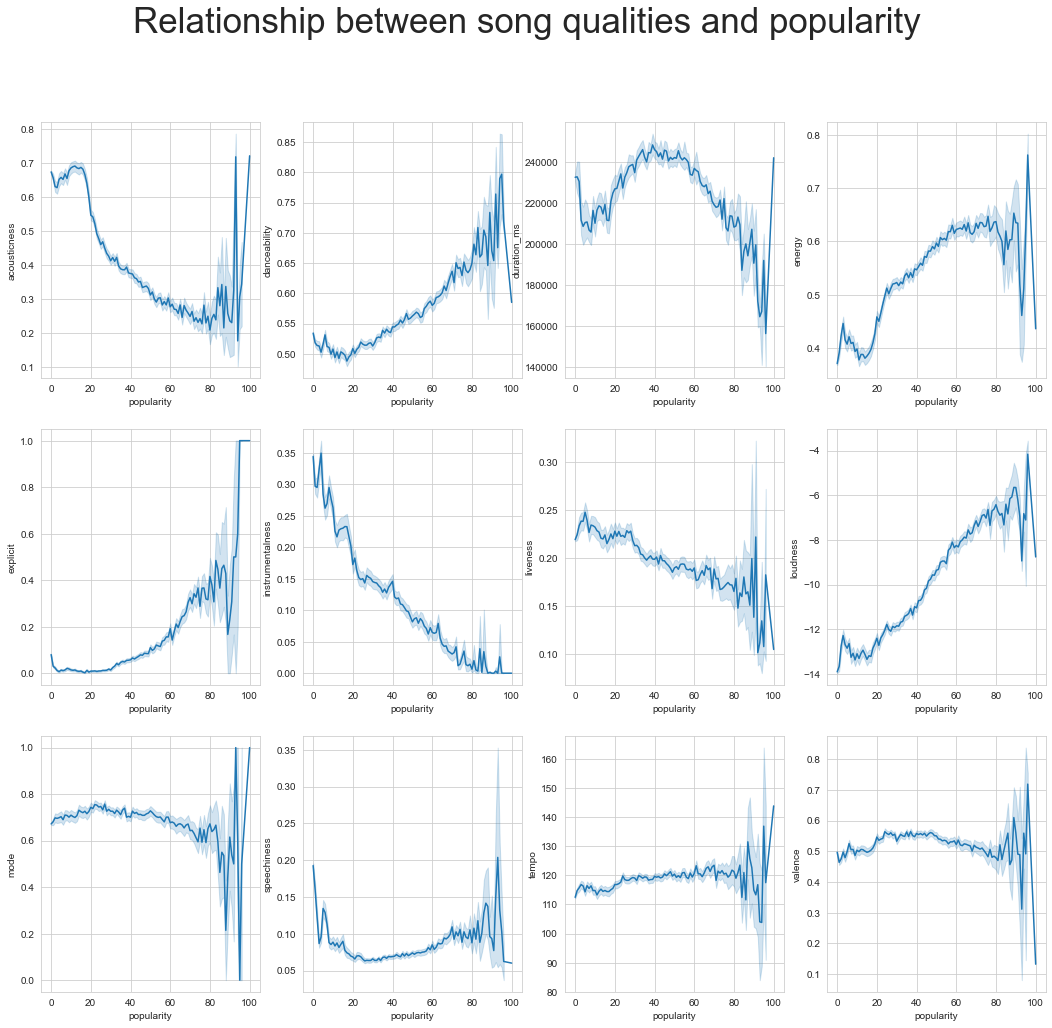

In [233]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 4, figsize=(18, 16))
sns.lineplot(y = 'acousticness', x = 'popularity', data = data, ax=axes[0,0])
sns.lineplot(y = 'danceability', x = 'popularity', data = data, ax=axes[0,1])
sns.lineplot(y = 'duration_ms', x = 'popularity', data = data, ax=axes[0,2])
sns.lineplot(y = 'energy', x = 'popularity', data = data, ax=axes[0,3])
sns.lineplot(y = 'explicit', x = 'popularity', data = data, ax=axes[1,0])
sns.lineplot(y = 'instrumentalness', x = 'popularity', data = data, ax=axes[1,1])
sns.lineplot(y = 'liveness', x = 'popularity', data = data, ax=axes[1,2])
sns.lineplot(y = 'loudness', x = 'popularity', data = data, ax=axes[1,3])
sns.lineplot(y = 'mode', x = 'popularity', data = data, ax=axes[2,0])
sns.lineplot(y = 'speechiness', x = 'popularity', data = data, ax=axes[2,1])
sns.lineplot(y = 'tempo', x = 'popularity', data = data, ax=axes[2,2])
sns.lineplot(y = 'valence', x = 'popularity', data = data, ax=axes[2,3])

fig.suptitle('Relationship between song qualities and popularity', fontsize = 35)

#### These plots are interesting because they allow us to examine a relationship between song quality and song popularity. 
#### From these lineplots, the following relationships can be observed:
#### 1. Graph 1 shows that The less acousitic a song is, the more popular it is.
#### 2. Graph 2 shows that The more danceable the song is, the more popular it is.
#### 3. Graph 3 shows that Song duration does not have an effect on the song's popularity.
#### 4. Graph 4 shows that The more energetic a song is, the more popular it is.
#### 5. Graph 5 shows that The more explicit a song is, the more popular it is.
#### 6. Graph 6 shows that The less instrumental a song is, the more popular it is.
#### 7. Graph 7 shows that The less liveness a song has, the more popular it is.
#### 8. Graph 8 shows that The more loud a song is, the more popular it is.
#### 9. Graph 9 shows that Mode does not have an effect on the song's popularity.
#### 10. Graph 10 shows that  Speechiness does not have effect on the song's popularity.
#### 11. Graph 11 shows that Tempo does not have an effect on the song's popularity.
#### 12. Graph 12 shows that Valence does not have an effect on the song's popularity

### Question: What makes a song popular?
### Hypothesis: If a song has low acousticness, high danceability, high energy, high explicitness, low intrumentalness, low liveness, and high loudness it will be very popular.

#### Let's explore this hypothesis. I will try to find evidence from the data that supports or refutes the hypothesis


#### In the previous cells we observed that duration_ms, mode, tempo, valence, and liveness do not have a relationship with song popularity. So we will now remove them from our dataset.

In [234]:
not_interested = ['duration_ms', 'mode', 'tempo', 'valence', 'liveness']
data = data.drop(not_interested, axis=1)

#### We have a lot of datapoints so making a scatter plot for all of them is simply not feasible, as the graph
#### would just be covered with datapoints and we won't be able to see the lines and hence, the relationship.
#### To solve that problem I use the .sample() method which extracts n random data points from the dataset. For the purpose of this question, we will be using 800 randomly sampled data points for each scatter plot.

<a id = 'acousticnesspopularity'></a>

Correlation:  -0.3905461230068619


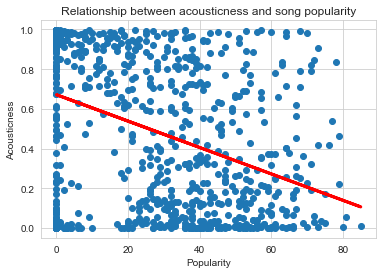

In [235]:
# woah! these things are falling from the sky or something
import matplotlib.pyplot as plt
data2 = data.sample(n=800)
y = data2['acousticness']
x = data2['popularity']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, m*x + b, color='red', linewidth=3)
plt.title('Relationship between acousticness and song popularity')
plt.xlabel('Popularity')
plt.ylabel('Acousticness')

r = x.corr(y)
print("Correlation: " , r)


Correlation:  0.12802563919068768


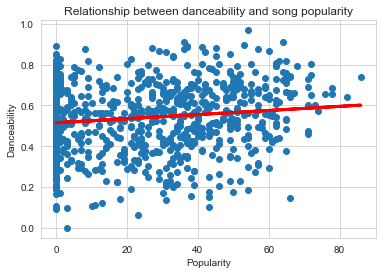

In [236]:
import matplotlib.pyplot as plt
data2 = data.sample(n=800)
y = data2['danceability']
x = data2['popularity']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, m*x + b, color='red', linewidth=3)
plt.title('Relationship between danceability and song popularity')
plt.xlabel('Popularity')
plt.ylabel('Danceability')

r = x.corr(y)
print("Correlation: " , r)

<a id = 'energypopularity'></a>

Correlation:  0.346542924864033


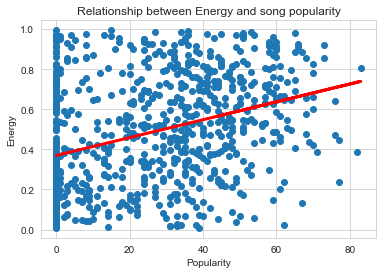

In [237]:
import matplotlib.pyplot as plt
data2 = data.sample(n=800)
y = data2['energy']
x = data2['popularity']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, m*x + b, color='red', linewidth=3)
plt.title('Relationship between Energy and song popularity')
plt.xlabel('Popularity')
plt.ylabel('Energy')

r = x.corr(y)
print("Correlation: " , r)

Correlation:  0.16848534139555965


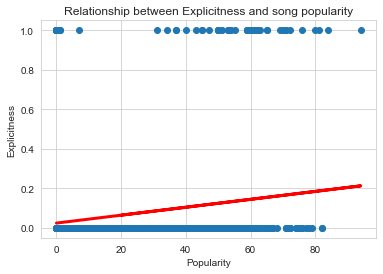

In [238]:
import matplotlib.pyplot as plt
data2 = data.sample(n=800)
y = data2['explicit']
x = data2['popularity']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, m*x + b, color='red', linewidth=3)
plt.title('Relationship between Explicitness and song popularity')
plt.xlabel('Popularity')
plt.ylabel('Explicitness')

r = x.corr(y)
print("Correlation: " , r)

<a id = 'instrumentalnesspopularity'></a>

Correlation:  -0.30061512207607993


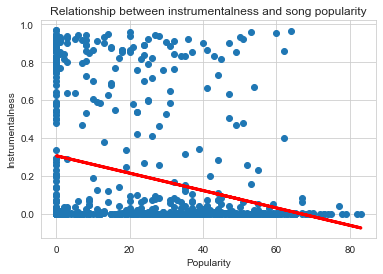

In [239]:
import matplotlib.pyplot as plt
data2 = data.sample(n=800)
y = data2['instrumentalness']
x = data2['popularity']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, m*x + b, color='red', linewidth=3)

plt.title('Relationship between instrumentalness and song popularity')
plt.xlabel('Popularity')
plt.ylabel('Instrumentalness')

r = x.corr(y)
print("Correlation: " , r)

<a id = 'loudnesspopularity'></a>

Correlation:  0.391684801804498


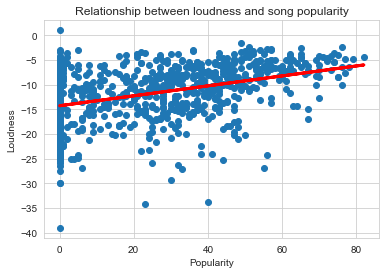

In [240]:
import matplotlib.pyplot as plt
data2 = data.sample(n=800)
y = data2['loudness']
x = data2['popularity']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, m*x + b, color='red', linewidth=3)

plt.title('Relationship between loudness and song popularity')
plt.xlabel('Popularity')
plt.ylabel('Loudness')

r = x.corr(y)
print("Correlation: " , r)

Correlation:  -0.17499726750518377


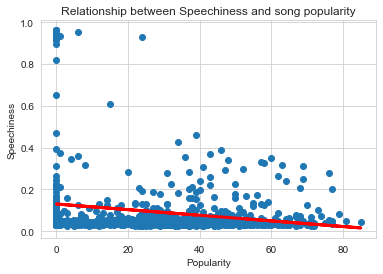

In [241]:
import matplotlib.pyplot as plt
data2 = data.sample(n=800)
y = data2['speechiness']
x = data2['popularity']
m, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, m*x + b, color='red', linewidth=3)

plt.title('Relationship between Speechiness and song popularity')
plt.xlabel('Popularity')
plt.ylabel('Speechiness')

r = x.corr(y)
print("Correlation: " , r)

Text(0.5, 1.0, 'Heatmap of features')

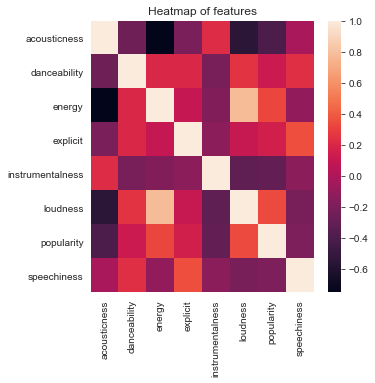

In [272]:
features = spotify_numeric_data.columns.tolist()
features.remove('key')
features.remove('year')
features.remove('tempo')
features.remove('valence')
features.remove('mode')
features.remove('liveness')
features.remove('duration_ms')
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data[features].corr(),ax=ax)
plt.title('Heatmap of features')

#### This heatmap shows the strength of correlation between all the features. The lighter the color of each box, the more positive the correlation is between the two features. The darker the color of each box, the more negative the correlation is between the two features. Right now, we are only focused on the correlation between each feature's correlation with popularity. From the heatmap, we observe that acousticness has the darkest color which means it is most negatively correlated with popularity. The second darkest is intrumentalness and the third darkest is speechiness. The feature with the lighest colors are loudness and energy which means they are most positively correlated with popularity. Explicit and danceability are comparatively darker which means they are less positively correlated

#### A popularity of a song varies with time as people's preferences in music change. And so, it is important to examine whether our hypothesis is only relevant to songs right now or has it been true forever. Has a song having high acousticness always been less popular among people? Has a song having high energy always been more popular among people? To answer questions like these, I will import the data_by_year.csv document to examine how all the features in our hypothesis have varied over the years and how that has affected song popularity in each year. 

In [193]:
data_by_year = pd.read_csv('./utility/data/data_by_year.csv')

Text(0.5, 0.98, 'How song qualities and popularity have varied over the years')

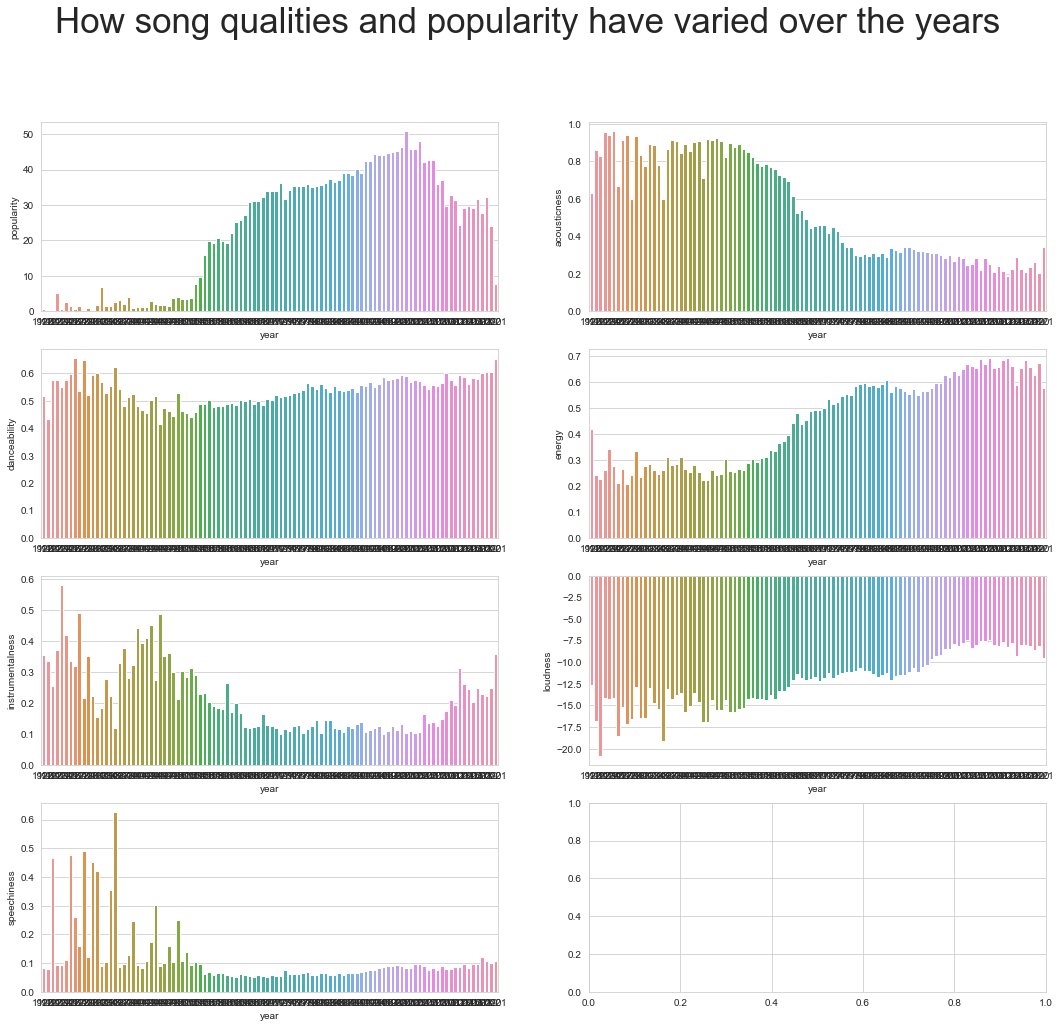

In [191]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,2, figsize=(18, 16))
sns.barplot(x='year',y='popularity',data = data_by_year,ax=axes[0,0])
sns.barplot(x='year',y='acousticness',data = data_by_year,ax=axes[0,1])
sns.barplot(x='year',y='danceability',data = data_by_year,ax=axes[1,0])
sns.barplot(x='year',y='energy',data = data_by_year,ax=axes[1,1])
sns.barplot(x='year',y='instrumentalness',data = data_by_year,ax=axes[2,0])
sns.barplot(x='year',y='loudness',data = data_by_year,ax=axes[2,1])
sns.barplot(x='year',y='speechiness',data = data_by_year,ax=axes[3,0])
fig.suptitle('How song qualities and popularity have varied over the years', fontsize = 35)

#### From these graphs, we observe that over the years popularity has increased, acousticness has decreased, danceability has increased, energy has increased, instrumentalness has decreased, loudness has increased and speechiness has decreased. This trend is in line with our hypothesis.

#### Now that we have an idea of what kind of correlation exists between all the features and popularity, we will use the pandas .corr() method to get the correlation coefficient of all the features with popularity to see if our hypothesis and the results we obtained from our plots are correct.

In [143]:
data.corr()['popularity']

acousticness       -0.396744
danceability        0.123746
energy              0.328939
explicit            0.152545
instrumentalness   -0.300625
loudness            0.337194
popularity          1.000000
speechiness        -0.195329
Name: popularity, dtype: float64

#### The results of the correlation calculation completely agree with the hypothesis: "If a song has low acousticness, high danceability, high energy, high explicitness, low intrumentalness, low liveness, and high loudness it will be very popular."

#### My recommendation to songwriters would be make sure their songs have high energy and are loud because those qualities are very pivotal in a song being more popular than others. This claim is evidenced by this[Energy-Popularity relationship graph](#energypopularity) and this [Loudness-Popularity relationship graph](#loudnesspopularity). Secondly, I would recommend songwriters to avoid their songs from being too acoustic and too instrumental because that has shown to have a negative effect on a song's popularity among people. This claim is evidenced by this cell [Acousticness-Popularity relationship graph](#acousticnesspopularity) and this [Instrumentalness-Popularity relationship graph](#instrumentalnesspopularity). 